In [5]:
# Preprocessing phase.
import pandas as pd
data = pd.read_csv("Mall_Customers.csv")
# Head of the Dataset
data.head()
#Titanic.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data=data.drop("CustomerID", axis=1)
data["Gender"]=data["Gender"].map({"Male":1, "Female":0})  #convert Gender values into numerical
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [7]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric

In [8]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,4
1,3
2,4
3,3
4,4
...,...
195,2
196,0
197,2
198,0


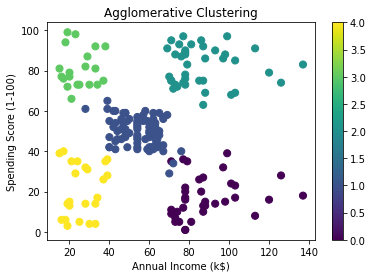

In [12]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['Annual Income (k$)'] , data ["Spending Score (1-100)"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("Annual Income (k$)")
ax.set_ylabel("Spending Score (1-100)")
plt.colorbar(scatter)

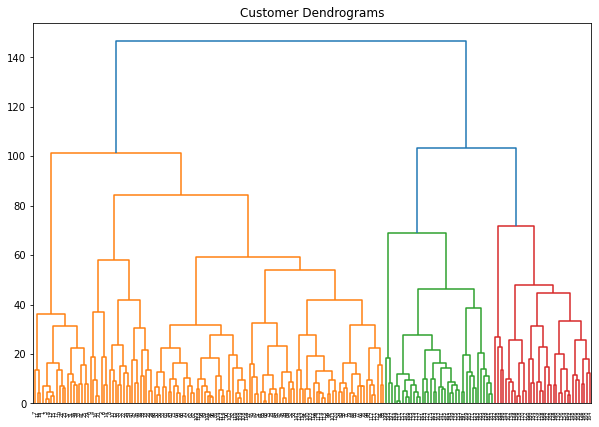

In [13]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))

# K-Means

In [14]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=5, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)

KMeans(n_clusters=5, random_state=0)

In [15]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,0
1,4
2,0
3,4
4,0
...,...
195,1
196,3
197,1
198,3


In [20]:
kmeans.predict(data)
print(kmeans.cluster_centers_)   #Printing the coordinates of cluster centers.

[[ 0.39130435 45.2173913  26.30434783 20.91304348]
 [ 0.46153846 32.69230769 86.53846154 82.12820513]
 [ 0.41772152 43.08860759 55.29113924 49.56962025]
 [ 0.52777778 40.66666667 87.75       17.58333333]
 [ 0.39130435 25.52173913 26.30434783 78.56521739]]


In [41]:
labels[0]

0      0
1      4
2      0
3      4
4      0
      ..
195    1
196    3
197    1
198    3
199    1
Name: 0, Length: 200, dtype: int32

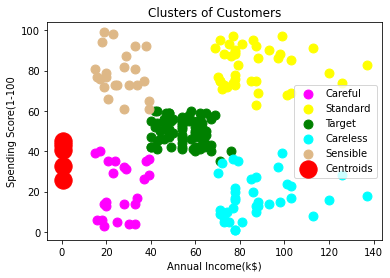

In [45]:
plt.scatter(data["Annual Income (k$)"][labels[0] == 0],          
            data["Spending Score (1-100)"][labels[0] == 0],s=80,c='magenta',label='Careful')
plt.scatter(data["Annual Income (k$)"][labels[0] == 1],
           data["Spending Score (1-100)"][labels[0] == 1],s=80,c='yellow',label='Standard')
plt.scatter(data["Annual Income (k$)"][labels[0] == 2],
           data["Spending Score (1-100)"][labels[0] == 2],s=80,c='green',label='Target')
plt.scatter(data["Annual Income (k$)"][labels[0] == 3], 
           data["Spending Score (1-100)"][labels[0] == 3],s=80,c='cyan',label='Careless')
plt.scatter(data["Annual Income (k$)"][labels[0] == 4], 
           data["Spending Score (1-100)"][labels[0] == 4],s=80,c='burlywood',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.legend()
plt.show()

In [43]:
kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1]

(array([0.39130435, 0.46153846, 0.41772152, 0.52777778, 0.39130435]),
 array([45.2173913 , 32.69230769, 43.08860759, 40.66666667, 25.52173913]))

In [50]:
Sum_of_squared_distances =[]
k = range(1,15)
for k in k:
    km = KMeans(n_clusters =k)
    km = km.fit(data)
    Sum_of_squared_distances.append(km.inertia_)

C:\Users\Abderrahmen Mansour\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


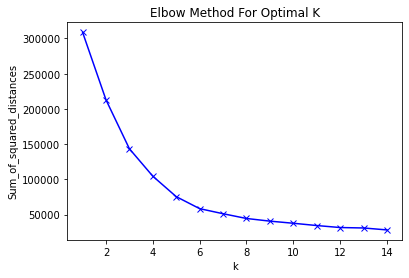

In [58]:
k = range(1,15)
plt.plot(k,Sum_of_squared_distances,'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal K')
plt.show()